# Part 3: Overview of Plotting Functions


In [2]:
# Let's get our standard imports out of the way
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

# Filled Regions: `fill_between(...)`


In its most basic form, `ax.fill_between(...)` fills between the given y-values and 0:

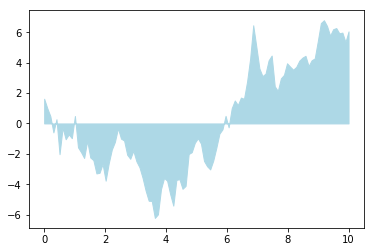

In [3]:
np.random.seed(1)
y = np.random.randn(100).cumsum()
x = np.linspace(0, 10, 100)

fig, ax = plt.subplots()
ax.fill_between(x, y, color='lightblue')


However, it can also be used to fill between two curves.  This is particularly useful when you want to show an envelope of some sort (e.g. error, confidence, amplitude, etc).

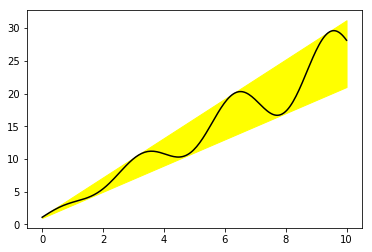

In [4]:
x = np.linspace(0, 10, 200)
y1 = 2 * x + 1
y2 = 3 * x + 1.2
y_mean = 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between(x, y1, y2, color='yellow')

# Plot the "centerline" with `plot`
ax.plot(x, y_mean, color='black')



## `data` keyword argument

When using nested data structures such as h5py objects, Pandas DataFrames, or XArrays, the data can be accessed via `[]` like dictionary elements. This can get very repetitive and tedious as one types out a plotting command accessing those elements. So, the `data` keyword argument was added to almost all of the plotting functions in v1.5. With this feature, one can pass in a single dictionary-like object as `data`, and use the string key names in the place of the usual input data arguments.

Let's revisit the above example:

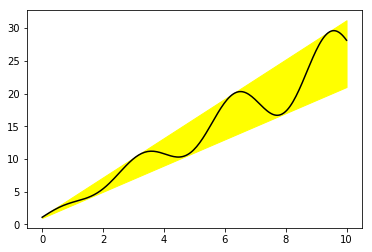

In [5]:
x = np.linspace(0, 10, 200)
data_obj = {'x': x,
            'y1': 2 * x + 1,
            'y2': 3 * x + 1.2,
            'mean': 0.5 * x * np.cos(2*x) + 2.5 * x + 1.1}

fig, ax = plt.subplots()

# Plot the envelope with `fill_between`
ax.fill_between('x', 'y1', 'y2', color='yellow', data=data_obj)

# Plot the "centerline" with `plot`
ax.plot('x', 'mean', color='black', data=data_obj)


### Exercise

Now let's try combining `bar` and `fill_between`. Make a plot using the data below that shows a bar plot over time, with a shaded area showing a confidence interval.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Generate data...
y_raw = np.random.randn(1000).cumsum() + 15
x_raw = np.linspace(0, 24, y_raw.size)

# Get averages of every 100 samples...
x_pos = x_raw.reshape(-1, 100).min(axis=1)
y_avg = y_raw.reshape(-1, 100).mean(axis=1)
y_err = y_raw.reshape(-1, 100).ptp(axis=1)

bar_width = x_pos[1] - x_pos[0]

# Make a made up future prediction with a fake confidence
x_pred = np.linspace(0, 30)
y_max_pred = y_avg[0] + y_err[0] + 2.3 * x_pred
y_min_pred = y_avg[0] - y_err[0] + 1.2 * x_pred

# Just so you don't have to guess at the colors...
barcolor, linecolor, fillcolor = 'wheat', 'salmon', 'lightblue'

# Now you're on your own!


-------------
Sample answer

-----------

Text(0,0.5,'greatness')

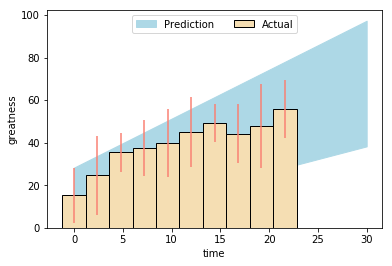

In [8]:
fig, ax = plt.subplots()
ax.fill_between(x_pred, y_min_pred, y_max_pred, label="Prediction", color=fillcolor)
ax.bar(x_pos, y_avg, bar_width, yerr=y_err, color=barcolor, ec='k', ecolor=linecolor, label="Actual")
ax.legend(loc="upper center", ncol=2)
ax.set_xlabel("time")
ax.set_ylabel("greatness")


# Contours, images, etc.

### Shared parameters for `imshow`, `pcolormesh`, `contour`, `scatter`, etc
  
  As we mentioned earlier, any plotting method that creates a `ScalarMappable` will have some common kwargs.  The ones you'll use the most frequently are:
  
  * `cmap` : The colormap (or name of the colormap) used to display the input.  (We'll go over the different colormaps in the next section.)
  * `vmin` : The minimum data value that will correspond to the "bottom" of the colormap (defaults to the minimum of your input data).
  * `vmax` : The maximum data value that will correspond to the "top" of the colormap (defaults to the maximum of your input data).
  * `norm` : A `Normalize` instance to control how the data values are mapped to the colormap. By default, this will be a linear scaling between `vmin` and `vmax`, but other norms are available (e.g. `LogNorm`, `PowerNorm`, etc).
  
`vmin` and `vmax` are particularly useful.  Quite often, you'll want the colors to be mapped to a set range of data values, which aren't the min/max of your input data. For example, you might want a symmetric ranges of values around 0.

See the documentation for longer discussions of [colormaps](https://matplotlib.org/tutorials/colors/colormaps.html) and [norms](https://matplotlib.org/tutorials/colors/colormapnorms.html).

As an example of that, let's use a divergent colormap with the data we showed earlier. 

In [10]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, optional, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (`sharex`) or y (`sharey`)
        axes:
    
            - True or 'all': x- or y-axis will be shared among all
              subplots.
            - False or 'none': each subplot x- or y-axis will be
              independent.
            - 'row': each subplot row will share an x- or y-axis.
            - 'col': each subplot column will share an x- or y-axis.
    
        Whe

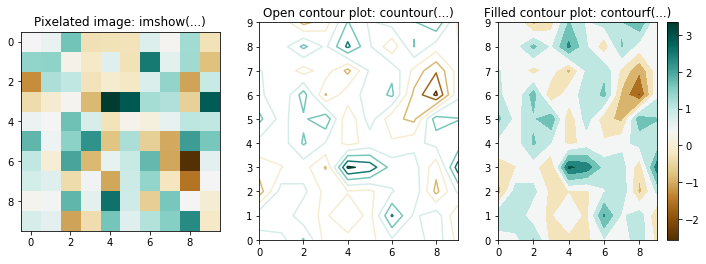

In [22]:
data = np.random.randn(10, 10) + 0.5

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=plt.figaspect(0.33))
im = ax[0].imshow(data, cmap="BrBG")
ax[0].set_title("Pixelated image: imshow(...)")

im2 = ax[1].contour(data, cmap="BrBG")
ax[1].set_title('Open contour plot: countour(...)')

im3 = ax[2].contourf(data, cmap="BrBG")
ax[2].set_title('Filled contour plot: contourf(...)')

fig.colorbar(im)

Let's work with the `imshow` plot. Let's say we want to make sure that white in the colormap to correspond to 0.  A quick way to do this is to make the `vmin` equal to the negative of the `vmax`.  

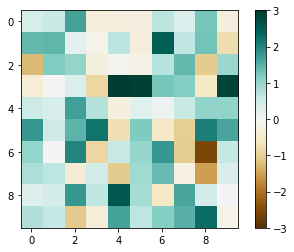

In [24]:
fig, ax = plt.subplots()
im = ax.imshow(data, 
               cmap='BrBG',
               vmin=-3, vmax=3)
fig.colorbar(im)

`vmin` and `vmax` are also very useful when we want multiple plots to share one colorbar, as our next exercise will do.

# Exercise

Can you reproduce the figure below?
<img src="images/exercise_2.2-vmin_vmax_imshow_and_colorbars.png">

Hint: try `help(fig.colorbar)` to see more parameters for the colorbar.

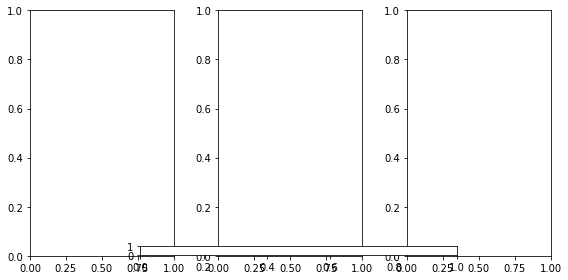

In [25]:
np.random.seed(1)

# Generate random data with different ranges...
data1 = np.random.random((10, 10))
data2 = 2 * np.random.random((10, 10))
data3 = 3 * np.random.random((10, 10))

# Set up our figure and axes...
fig, axes = plt.subplots(ncols=3, figsize=plt.figaspect(0.5))
fig.tight_layout() # Make the subplots fill up the figure a bit more...
cax = fig.add_axes([0.25, 0.1, 0.55, 0.03]) # Add an axes for the colorbar

# Now you're on your own!


----------------
Sample answer

----------------

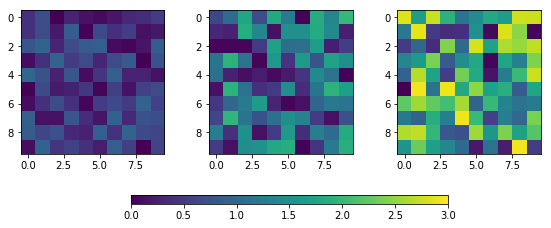

In [26]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

# Generate random data with different ranges...
data1 = np.random.random((10, 10))
data2 = 2 * np.random.random((10, 10))
data3 = 3 * np.random.random((10, 10))

# Set up our figure and axes...
fig, axes = plt.subplots(ncols=3, figsize=plt.figaspect(0.5))
fig.tight_layout() # Make the subplots fill up the figure a bit more...
cax = fig.add_axes([0.25, 0.1, 0.55, 0.03]) # Add an axes for the colorbar

vmin = 0
vmax = 3
# Now you're on your own!
im = axes[0].imshow(data1, cmap="viridis", vmin=vmin, vmax=vmax)
axes[1].imshow(data2, cmap="viridis", vmin=vmin, vmax=vmax)
axes[2].imshow(data3, cmap="viridis", vmin=vmin, vmax=vmax)

fig.colorbar(im, cax, orientation='horizontal')